Predicted: [('n02107312', 'miniature_pinscher', 0.18151551), ('n02108000', 'EntleBucher', 0.16256118), ('n02107908', 'Appenzeller', 0.09727136)]


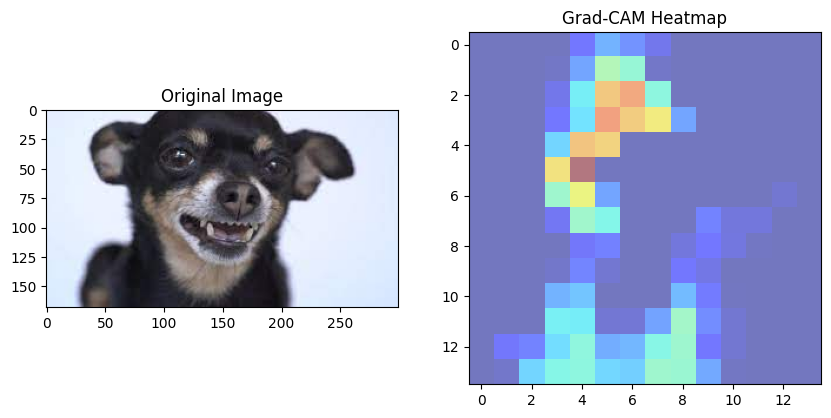

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K

tf.compat.v1.disable_eager_execution()

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# ...
# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Define a function to preprocess input image for the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Define a function to generate Grad-CAM heatmap
def generate_grad_cam(model, img_array, class_index):
    preds = model.predict(img_array)
    class_output = model.output[:, class_index]
    last_conv_layer = model.get_layer('block5_conv3')
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img_array])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Load sample image
image_path = '/content/images (1).jpg'
img_array = preprocess_image(image_path)

# Classify the image
preds = model.predict(img_array)
print('Predicted:', decode_predictions(preds, top=3)[0])

# Get the index of the predicted class
predicted_class_index = np.argmax(preds[0])
tf.compat.v1.disable_eager_execution()
# Generate Grad-CAM heatmap for the predicted class
heatmap = generate_grad_cam(model, img_array, predicted_class_index)

# Plot original image with Grad-CAM heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(image_path))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(image.load_img(image_path))
plt.imshow(heatmap, alpha=0.5, cmap='jet')
plt.title('Grad-CAM Heatmap')
plt.show()


Predicted Class: golden_retriever


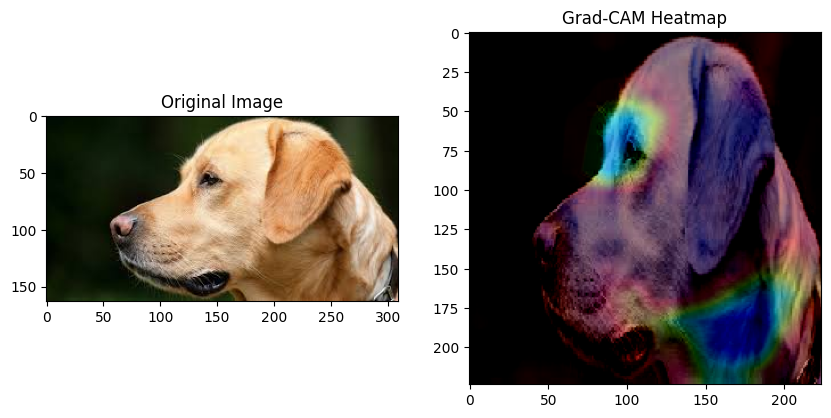

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import backend as K
import cv2

tf.compat.v1.disable_eager_execution()

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Define a function to preprocess input image for the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Define a function to generate Grad-CAM heatmap
def generate_grad_cam(model, img_array, class_index):
    preds = model.predict(img_array)
    class_output = model.output[:, class_index]
    last_conv_layer = model.get_layer('block5_conv3')
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img_array])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

# Load sample image
image_path = '/content/dog3.jpg'
img_array = preprocess_image(image_path)

# Get the index of the predicted class
predicted_class_index = np.argmax(model.predict(img_array)[0])

# Generate Grad-CAM heatmap for the predicted class
heatmap = generate_grad_cam(model, img_array, predicted_class_index)

# Resize heatmap to match the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))

# Convert heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# Apply heatmap as an overlay on the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Ensure pixel values are within [0, 255]
superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

# Decode and print the predicted class label
predicted_class_label = decode_predictions(model.predict(img_array), top=1)[0][0][1]
print('Predicted Class:', predicted_class_label)

# Plot original image with Grad-CAM heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(image_path))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Grad-CAM Heatmap')
plt.show()


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 23.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Build a YOLOv6n model from scratch


# Load a pre-trained YOLO model (assuming you have a Keras-based YOLO model)
yolo_model = YOLO("yolov6n.yaml")

def preprocess_image(img_path, target_size):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image at path {img_path} could not be loaded. Check the path or image file.")

    img = cv2.resize(img, target_size)  # Resize image to target size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (for Keras)
    img_array = img.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # normalize to [0, 1]
    return img_array

# Define Integrated Gradients function
def integrated_gradients(model, img_array, target_class_idx, baseline=None, steps=50):
    if baseline is None:
        baseline = np.zeros(img_array.shape).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    img_array = img_array.astype(np.float32)

    # Generate interpolated images between baseline and input
    interpolated_images = [
        baseline + (float(i) / steps) * (img_array - baseline)
        for i in range(steps + 1)
    ]
    interpolated_images = np.array(interpolated_images)

    # Compute gradients for each interpolated image
    with tf.GradientTape() as tape:
        tape.watch(interpolated_images)
        predictions = model(interpolated_images)
        target_predictions = predictions[:, target_class_idx]

    grads = tape.gradient(target_predictions, interpolated_images)

    # Average the gradients across all steps
    avg_grads = np.mean(grads, axis=0)

    # Compute Integrated Gradients
    integrated_grads = (img_array - baseline) * avg_grads
    return integrated_grads

# Load and preprocess the image
img_path = '/content/dog3.jpg'
img_array = preprocess_image(img_path, target_size=(416, 416))  # Adjust this to your model's input size

# Predict the class index (adjust this depending on your use case)
predictions = yolo_model.predict(img_array)
target_class_idx = np.argmax(predictions[0])  # Adjust based on your model's output format

# Compute Integrated Gradients
integrated_grads = integrated_gradients(yolo_model, img_array, target_class_idx)

# Visualize the result
integrated_grads = np.squeeze(integrated_grads)  # remove batch dimension
plt.imshow(integrated_grads)
plt.show()

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'resize'
